In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import resample
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import add_dummy_feature
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
import mord


### Load and Explore Data

In [29]:
df = pd.read_csv('winequality-white.csv', delimiter=';')
# df = pd.read_csv('winequality-red.csv', delimiter=';')

In [30]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [31]:
df.quality.value_counts(sort=False).sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [32]:
corr = df.corr()

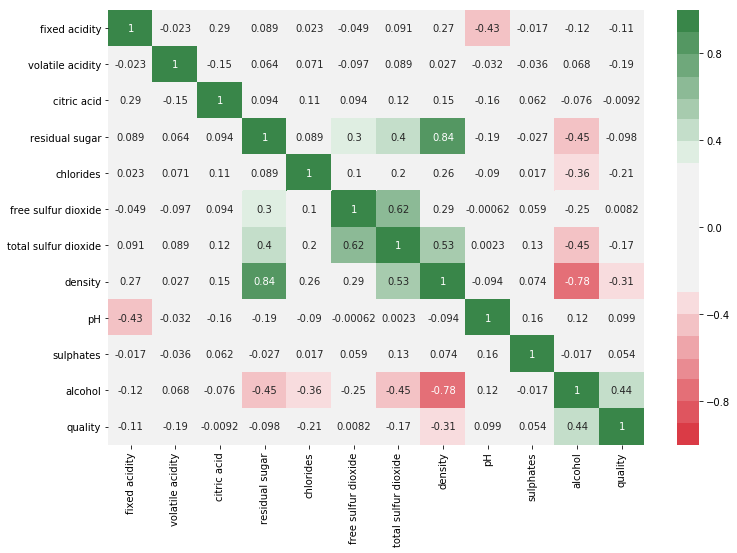

In [33]:
plt.figure(num=None, figsize=(12, 8))
sns.heatmap(corr, center=0, vmin=-1, vmax=1, cmap=sns.diverging_palette(10, 133, sep=80, n=20), annot=True)

In [34]:
from scipy import stats

In [35]:
for f in df.columns[:-1]:
    
    print('Feature: %s' % f)
    q_levels1 = df.quality.unique()
    q_levels2 = np.copy(q_levels1)
    
    for q1 in sorted(q_levels1):  
        for q2 in sorted(q_levels2):
            if q1 == q2:
                continue
            else:    
                _, pval = stats.ttest_ind(df[f][df.quality == q1], df[f][df.quality == q2], 0, False)
                print('    Q1: %d vs. Q2: %d, pval: %.3f' % (q1, q2, pval))
        
        print('\n')
        
    print(4*'----------' + '\n')

Feature: fixed acidity
    Q1: 3 vs. Q2: 4, pval: 0.247
    Q1: 3 vs. Q2: 5, pval: 0.101
    Q1: 3 vs. Q2: 6, pval: 0.063
    Q1: 3 vs. Q2: 7, pval: 0.037
    Q1: 3 vs. Q2: 8, pval: 0.025
    Q1: 3 vs. Q2: 9, pval: 0.764


    Q1: 4 vs. Q2: 3, pval: 0.247
    Q1: 4 vs. Q2: 5, pval: 0.027
    Q1: 4 vs. Q2: 6, pval: 0.001
    Q1: 4 vs. Q2: 7, pval: 0.000
    Q1: 4 vs. Q2: 8, pval: 0.000
    Q1: 4 vs. Q2: 9, pval: 0.550


    Q1: 5 vs. Q2: 3, pval: 0.101
    Q1: 5 vs. Q2: 4, pval: 0.027
    Q1: 5 vs. Q2: 6, pval: 0.001
    Q1: 5 vs. Q2: 7, pval: 0.000
    Q1: 5 vs. Q2: 8, pval: 0.000
    Q1: 5 vs. Q2: 9, pval: 0.331


    Q1: 6 vs. Q2: 3, pval: 0.063
    Q1: 6 vs. Q2: 4, pval: 0.001
    Q1: 6 vs. Q2: 5, pval: 0.001
    Q1: 6 vs. Q2: 7, pval: 0.001
    Q1: 6 vs. Q2: 8, pval: 0.006
    Q1: 6 vs. Q2: 9, pval: 0.256


    Q1: 7 vs. Q2: 3, pval: 0.037
    Q1: 7 vs. Q2: 4, pval: 0.000
    Q1: 7 vs. Q2: 5, pval: 0.000
    Q1: 7 vs. Q2: 6, pval: 0.001
    Q1: 7 vs. Q2: 8, pval: 0.248
    Q1: 7 vs

    Q1: 5 vs. Q2: 6, pval: 0.000
    Q1: 5 vs. Q2: 7, pval: 0.000
    Q1: 5 vs. Q2: 8, pval: 0.000
    Q1: 5 vs. Q2: 9, pval: 0.019


    Q1: 6 vs. Q2: 3, pval: 0.982
    Q1: 6 vs. Q2: 4, pval: 0.666
    Q1: 6 vs. Q2: 5, pval: 0.000
    Q1: 6 vs. Q2: 7, pval: 0.000
    Q1: 6 vs. Q2: 8, pval: 0.013
    Q1: 6 vs. Q2: 9, pval: 0.032


    Q1: 7 vs. Q2: 3, pval: 0.583
    Q1: 7 vs. Q2: 4, pval: 0.027
    Q1: 7 vs. Q2: 5, pval: 0.000
    Q1: 7 vs. Q2: 6, pval: 0.000
    Q1: 7 vs. Q2: 8, pval: 0.706
    Q1: 7 vs. Q2: 9, pval: 0.063


    Q1: 8 vs. Q2: 3, pval: 0.525
    Q1: 8 vs. Q2: 4, pval: 0.039
    Q1: 8 vs. Q2: 5, pval: 0.000
    Q1: 8 vs. Q2: 6, pval: 0.013
    Q1: 8 vs. Q2: 7, pval: 0.706
    Q1: 8 vs. Q2: 9, pval: 0.072


    Q1: 9 vs. Q2: 3, pval: 0.059
    Q1: 9 vs. Q2: 4, pval: 0.024
    Q1: 9 vs. Q2: 5, pval: 0.019
    Q1: 9 vs. Q2: 6, pval: 0.032
    Q1: 9 vs. Q2: 7, pval: 0.063
    Q1: 9 vs. Q2: 8, pval: 0.072


----------------------------------------

Feature: sulphates
    Q

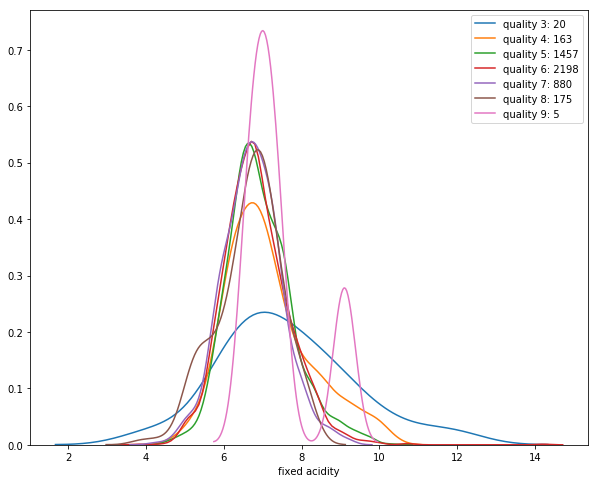

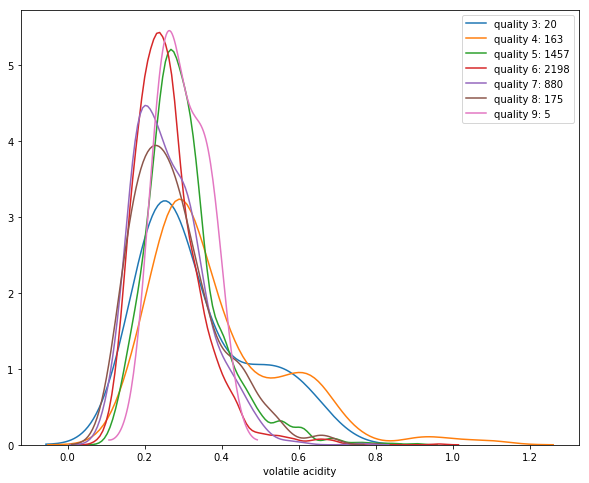

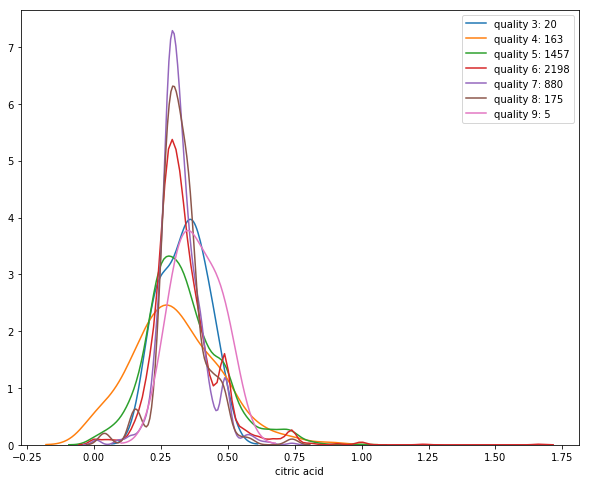

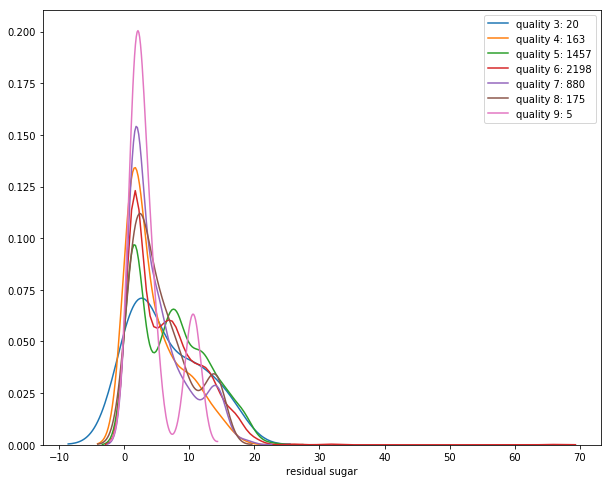

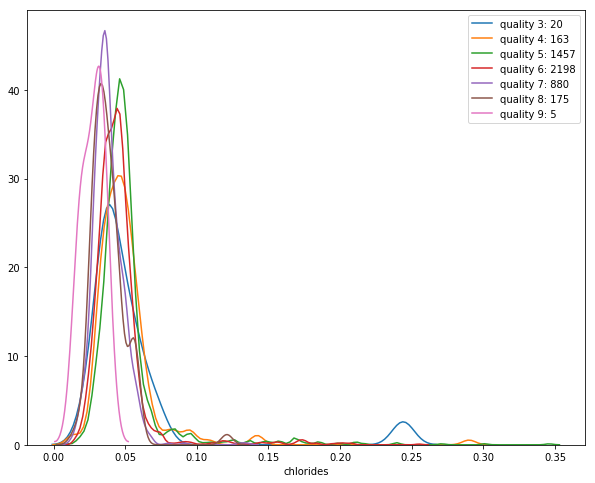

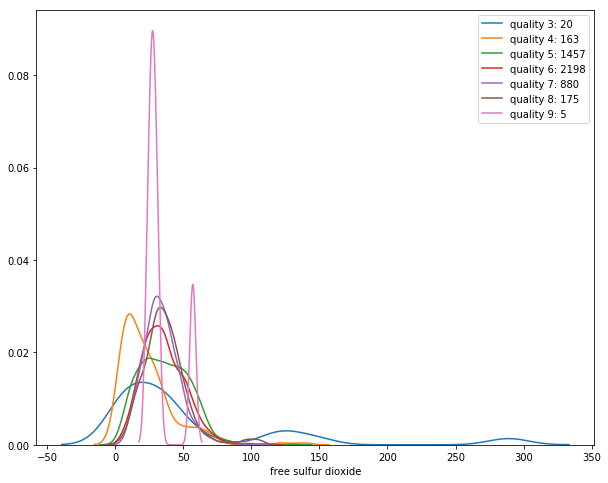

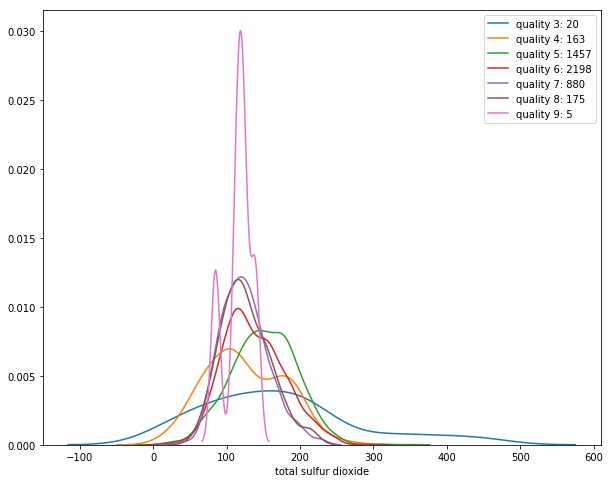

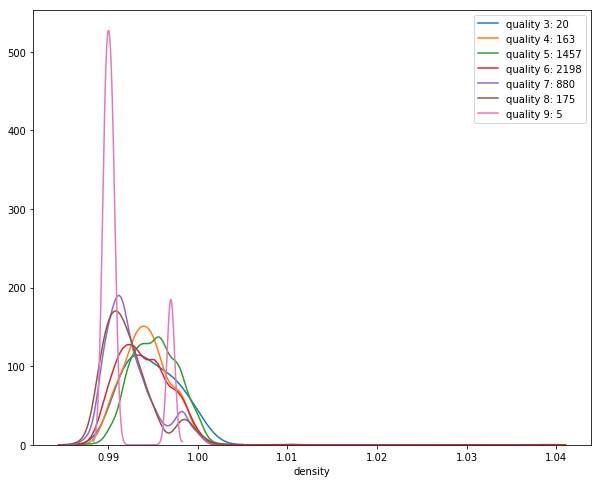

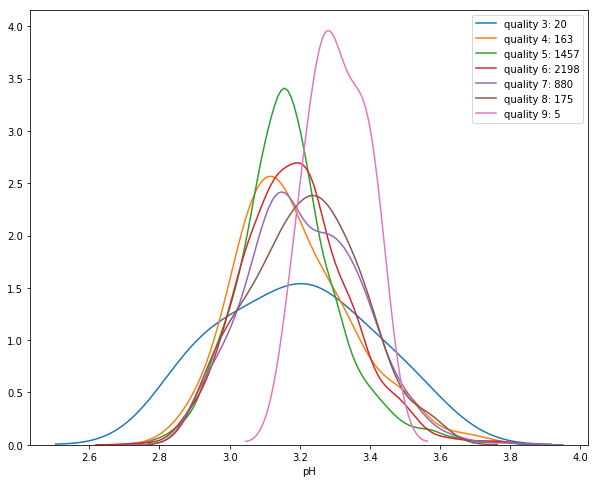

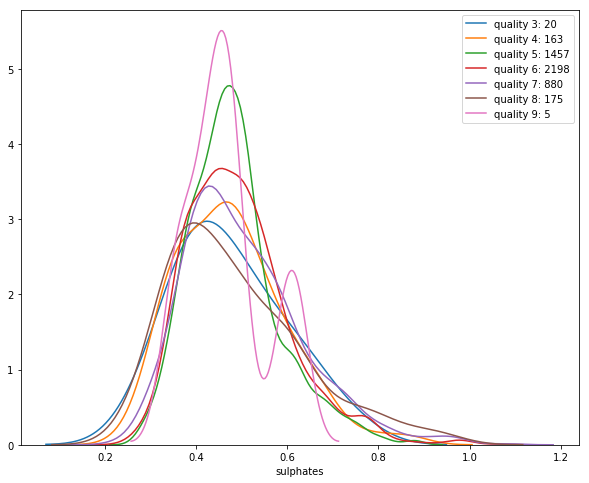

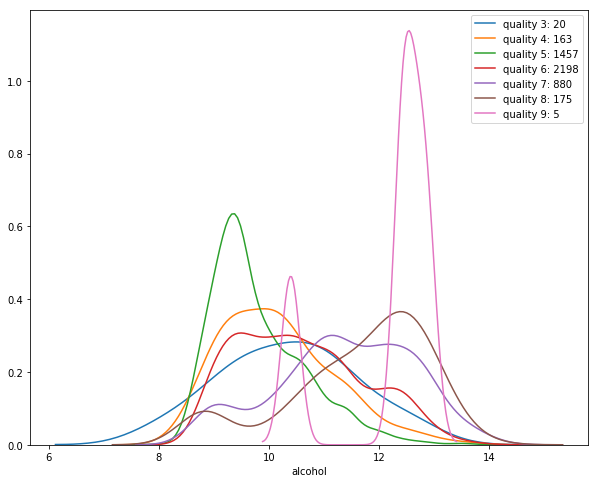

In [36]:
for f in df.columns[:-1]:
    plt.figure(num=None, figsize=(10, 8))
    for q in sorted(df.quality.unique()):
        sns.distplot(df[f][df.quality == q], hist=False, label=('quality %d: %d' % (q, df[f][df.quality == q].count())))
    plt.legend()

/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/cneiderer/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


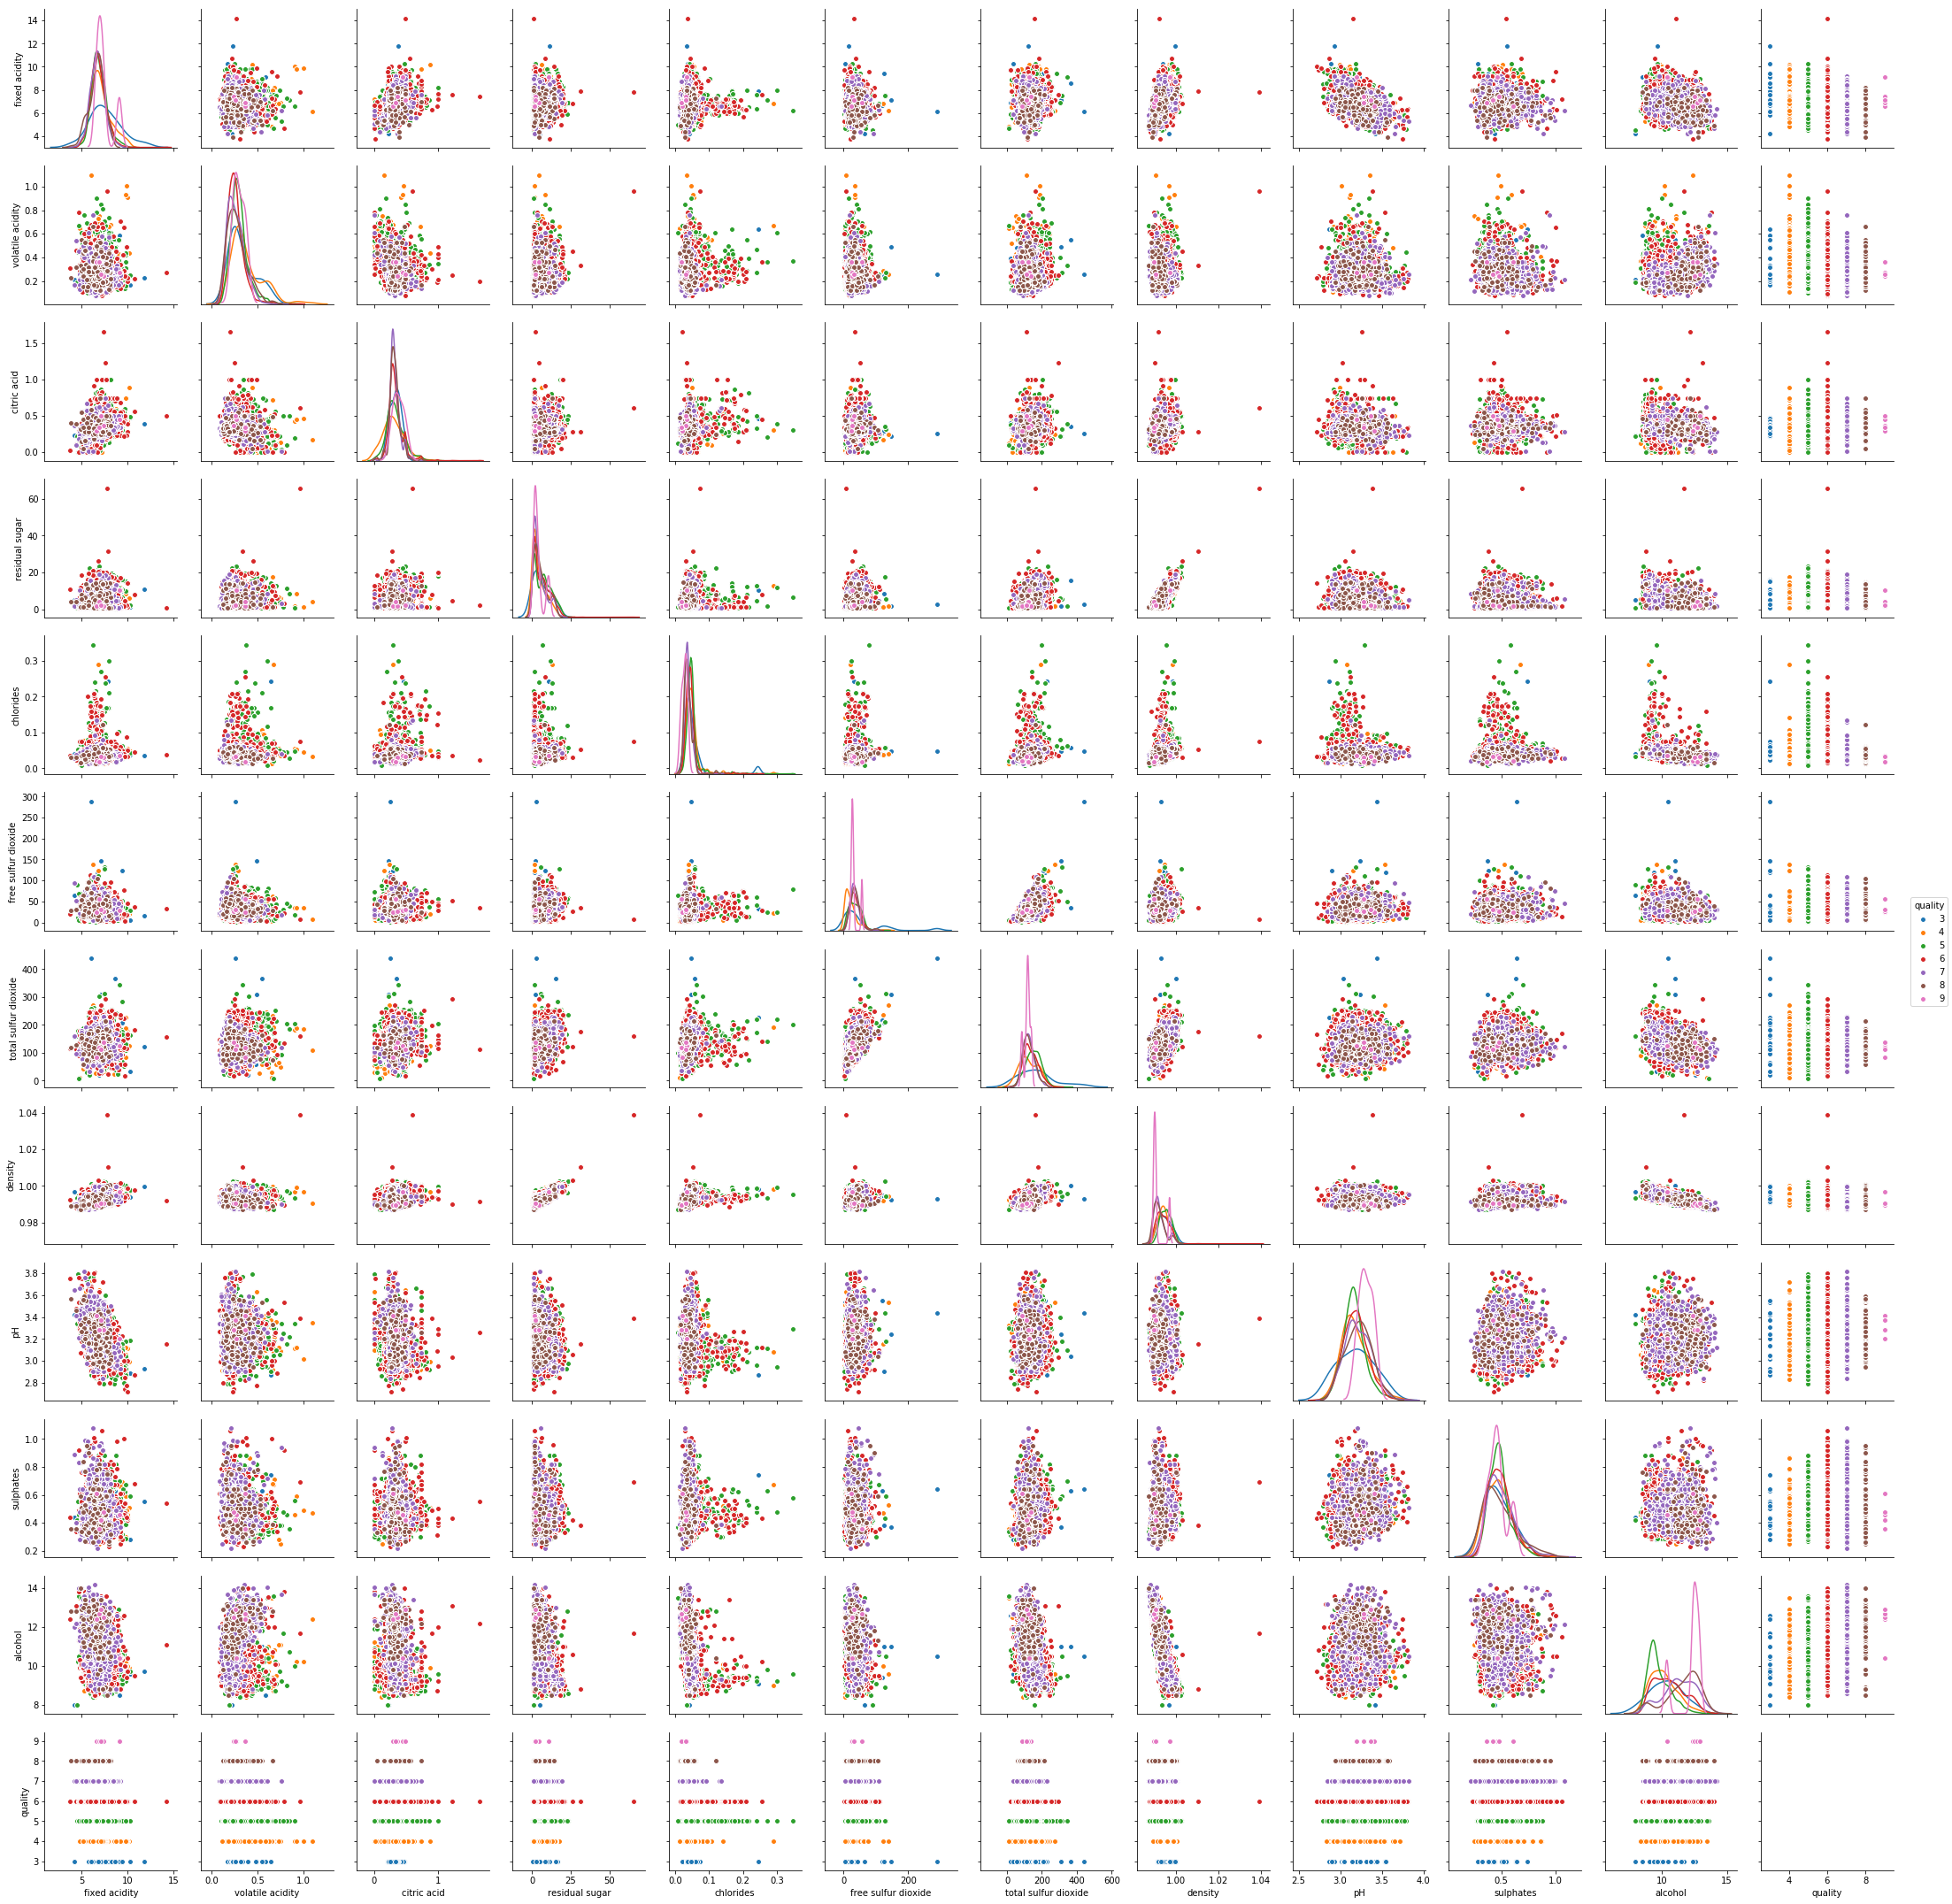

In [37]:
sns.pairplot(df, hue='quality', diag_kind='kde')

### Feature Engineering

In [38]:
def reciprocal(x):
    return 1/x

def negative_reciprocal(x):
    return -1/x

def logarithm(x):
    return np.log(x)

def square_root(x):
    return x ** 0.5

def cube_root(x):
    return x ** (1/3)

def square(x):
    return x ** 2

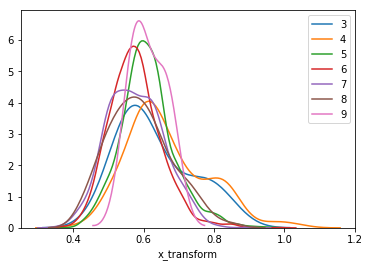

In [39]:
tmp = pd.concat([df['volatile acidity'], df['volatile acidity'].apply(lambda x: x ** (2/5)), df['quality']], 
                axis=1, keys=['x', 'x_transform', 'q'])
for q in sorted(tmp.q.unique()):
    sns.distplot(tmp.x_transform[tmp.q==q], hist=False, label=q)

### Subset Data

In [43]:
df_subset = df.copy()
df_subset['quality2'] = pd.cut(df.quality, bins=3, labels=[1, 2, 3]).astype('int') #['good', 'medium', 'bad'])

In [44]:
df_subset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2


### Split Data 

In [112]:
# Split 
# y = resampled_df.quality
# X = resampled_df.drop(columns='quality')

# y = df_subset.quality2
# X = df_subset.drop(columns=['quality', 'quality2'])

y = df.quality
X = df.drop(columns='quality')

# X = df[['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'alcohol']]
# X = df[['volatile acidity', 'alcohol']]

# Make sure intercept exists
if ~any(X.columns == 'Intercept'):
    X.insert(0, 'Intercept', 1)
else: 
    X.Intercept = 1
    
# Stratified Split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, test_size=.8, random_state=1294)

 ### Bootstrapping Data

In [ ]:
def sample_to_level_orig(orig_df, target_col, level=None):
    
    if level is None:
        level = int(orig_df[target_col].value_counts().median())
        
    resampled = {}
    for idx in df.quality.unique():
        orig = orig_df[df[target_col] == idx]
        resampled[idx] = pd.DataFrame() 
        resampled[idx] = resample(orig, replace=True,
                                  n_samples=level, random_state=129)
    
    resampled_df = pd.concat(resampled, ignore_index=True)
    
    return resampled_df

In [113]:
def sample_to_level(orig_df, target_col, level=None):
    
    cnts = orig_df[target_col].value_counts()
    if level is None:
        level = int(cnts.median())
    elif level is 'median':
        level = int(cnts.median())
    elif level is 'mean':
        level = int(cnts.mean())
    elif level is 'max':
        level = cnts.max()
        
    resampled = {}
    for idx in df.quality.unique():
        orig = orig_df[orig_df[target_col] == idx]
        resampled[idx] = pd.DataFrame() 
        resampled[idx] = resample(orig, replace=True,
                                  n_samples=level, random_state=129)
    
    resampled_df = pd.concat(resampled, ignore_index=True)
    
    return resampled_df

In [42]:
resampled_df.quality.value_counts()

7    1000
3    1000
6    1000
9    1000
5    1000
8    1000
4    1000
Name: quality, dtype: int64

### Build Models

#### Vanilla Logistic w/out Balanced Class Weight

In [114]:
# lr1 = make_pipeline(PolynomialFeatures(degree=2, interaction_only=False), LogisticRegression(C=1e3, random_state=129))
lr1 = LogisticRegression(C=1e3, random_state=129)
lr1.fit(X_train, y_train)

print(lr1)
# make predictions
lr1_pred = lr1.predict(X_test)
# summarize the fit of the model
print(classification_report(y_test, lr1_pred))
print(confusion_matrix(y_test, lr1_pred))

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=129,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          3       0.40      0.12      0.19        16
          4       0.50      0.04      0.07       130
          5       0.56      0.48      0.52      1166
          6       0.52      0.78      0.62      1759
          7       0.49      0.20      0.28       704
          8       0.00      0.00      0.00       140
          9       0.00      0.00      0.00         4

avg / total       0.51      0.53      0.49      3919

[[   2    0    6    8    0    0    0]
 [   0    5   72   52    1    0    0]
 [   2    4  560  595    5    0    0]
 [   1    1  296 1369   90    0    2]
 [   0    0   52  514  138    0    0]
 [   0    0   12   86   42    0    0]
 [   0    0    0    1    

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Balanced Logistic

In [115]:
# lr2 = make_pipeline(PolynomialFeatures(degree=2, interaction_only=False), LogisticRegression(C=1e3, class_weight='balanced', random_state=129))
lr2 = LogisticRegression(C=1e3, class_weight='balanced', random_state=129)
lr2.fit(X_train, y_train)

print(lr2)

# make predictions
lr2_pred = lr2.predict(X_test)

# summarize the fit of the model
print(classification_report(y_test, lr2_pred))
print(confusion_matrix(y_test, lr2_pred))

LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=129,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
             precision    recall  f1-score   support

          3       0.02      0.19      0.04        16
          4       0.15      0.41      0.22       130
          5       0.51      0.54      0.52      1166
          6       0.56      0.39      0.46      1759
          7       0.38      0.42      0.40       704
          8       0.07      0.09      0.07       140
          9       0.00      0.00      0.00         4

avg / total       0.48      0.43      0.44      3919

[[  3   5   2   4   2   0   0]
 [  7  53  46  12  11   1   0]
 [ 26 145 627 302  42  24   0]
 [ 61 109 451 683 358  85  12]
 [ 32  24  84 204 293  59   8]
 [ 15   6  13  24  68  12   2]
 [  1   0   0   0   3   0   0]]


#### Ordinal Logistic Flavors

In [116]:
# LogisticAT
ordlr1 = mord.LogisticAT(alpha=1e3)
ordlr1.fit(X_train, y_train)

print(ordlr1)
# make predictions
ordlr1_pred = ordlr1.predict(X_test)
# summarize the fit of the model
print(classification_report(y_test, ordlr1_pred))
print(confusion_matrix(y_test, ordlr1_pred))

LogisticAT(alpha=1000.0, max_iter=1000, verbose=0)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00       130
          5       0.44      0.18      0.26      1166
          6       0.46      0.90      0.61      1759
          7       0.23      0.01      0.02       704
          8       0.00      0.00      0.00       140
          9       0.00      0.00      0.00         4

avg / total       0.38      0.46      0.35      3919

[[   0    0    5    9    1    1    0]
 [   0    0   36   91    3    0    0]
 [   0    0  210  952    4    0    0]
 [   0    0  173 1579    7    0    0]
 [   0    0   48  649    7    0    0]
 [   0    0    5  128    7    0    0]
 [   0    0    0    3    1    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [117]:
# LogisticIT
ordlr2 = mord.LogisticIT(alpha=100)
ordlr2.fit(X_train, y_train)

print(ordlr2)
# make predictions
ordlr2_pred = ordlr2.predict(X_test)
# summarize the fit of the model
print(classification_report(y_test, ordlr2_pred))
print(confusion_matrix(y_test, ordlr2_pred))

LogisticIT(alpha=100, max_iter=1000, verbose=0)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00       130
          5       0.49      0.33      0.39      1166
          6       0.49      0.83      0.61      1759
          7       0.43      0.08      0.14       704
          8       0.00      0.00      0.00       140
          9       0.00      0.00      0.00         4

avg / total       0.44      0.49      0.42      3919

[[   0    0    5    9    1    1    0]
 [   0    0   59   69    2    0    0]
 [   0    0  382  779    5    0    0]
 [   0    0  258 1463   38    0    0]
 [   0    0   63  582   59    0    0]
 [   0    0   14   96   30    0    0]
 [   0    0    0    3    1    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [118]:
# LogisticSE
ordlr3 = mord.LogisticSE(alpha=100)
ordlr3.fit(X_train, y_train)

print(ordlr3)
# make predictions
ordlr3_pred = ordlr3.predict(X_test)
# summarize the fit of the model
print(classification_report(y_test, ordlr3_pred))
print(confusion_matrix(y_test, ordlr3_pred))

LogisticSE(alpha=100, max_iter=100000, verbose=0)
             precision    recall  f1-score   support

          3       0.00      0.00      0.00        16
          4       0.00      0.00      0.00       130
          5       0.50      0.29      0.37      1166
          6       0.49      0.84      0.62      1759
          7       0.47      0.14      0.21       704
          8       0.00      0.00      0.00       140
          9       0.00      0.00      0.00         4

avg / total       0.45      0.49      0.42      3919

[[   0    0    4   10    1    1    0]
 [   0    0   54   74    2    0    0]
 [   0    0  337  824    5    0    0]
 [   0    0  217 1479   63    0    0]
 [   0    0   53  555   96    0    0]
 [   0    0    7   97   36    0    0]
 [   0    0    0    3    1    0    0]]


/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
